In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/rossmann.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month

data.head()

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [28]:
data.Store.value_counts()

1023    942
666     942
675     942
163     942
674     942
162     942
673     942
161     942
672     942
160     942
158     942
157     942
668     942
156     942
667     942
154     942
657     942
665     942
153     942
664     942
152     942
663     942
151     942
662     942
150     942
661     942
148     942
659     942
147     942
658     942
       ... 
636     758
637     758
879     758
638     758
129     758
604     758
365     758
132     758
644     758
646     758
136     758
137     758
629     758
115     758
113     758
890     758
893     758
620     758
108     758
619     758
385     758
612     758
100     758
611     758
99      758
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [5]:
data.index.year

Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
           dtype='int64', name=u'Date', length=1017209)

In [6]:
data['2014'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-12-31,1,3,2605,327,1,0,0,1,2014,12
2014-12-31,2,3,2269,252,1,0,0,1,2014,12
2014-12-31,3,3,3804,408,1,0,0,1,2014,12
2014-12-31,4,3,10152,1311,1,0,0,1,2014,12
2014-12-31,5,3,1830,217,1,0,0,1,2014,12


In [7]:
data['2014-05'].head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2014-05-31,1,6,4985,560,1,0,0,0,2014,5
2014-05-31,2,6,2953,485,1,0,0,0,2014,5
2014-05-31,3,6,4725,514,1,0,0,0,2014,5
2014-05-31,4,6,11018,1542,1,0,0,0,2014,5
2014-05-31,5,6,2026,235,1,0,0,0,2014,5


In [8]:
import seaborn as sb
%matplotlib inline

In [9]:
store1_data = data[data.Store == 1]
store1_data.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name=u'Date', length=942, freq=None)

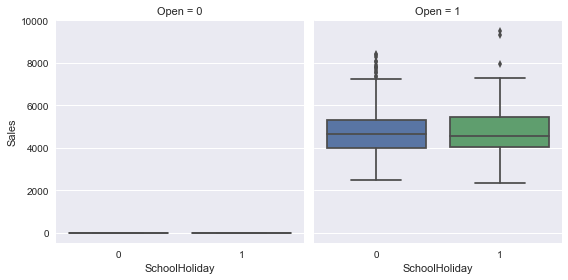

In [10]:
sb.factorplot(
    col='Open',
    x='SchoolHoliday',
    y='Sales',
    data=store1_data, 
    kind='box'
)

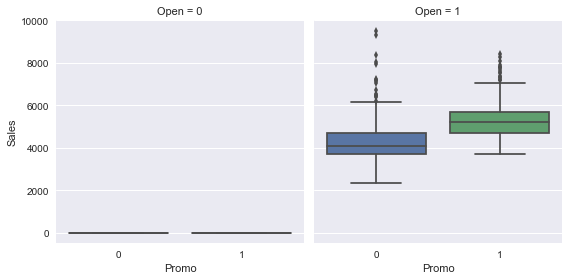

In [11]:
#TODO: Check if there is a difference affecting sales on promotion days.
sb.factorplot(
    col='Open',
    x='Promo',
    y='Sales',
    data=store1_data, 
    kind='box'
)

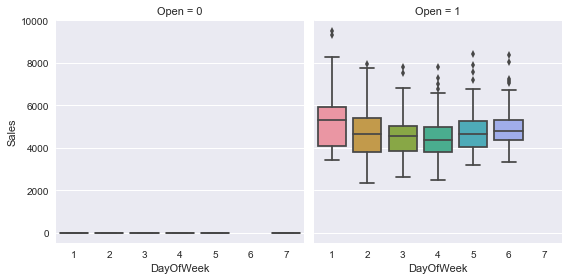

In [12]:
sb.factorplot(
    col='Open',
    x='DayOfWeek',
    y='Sales',
    data=store1_data,
    kind='box',
    
)

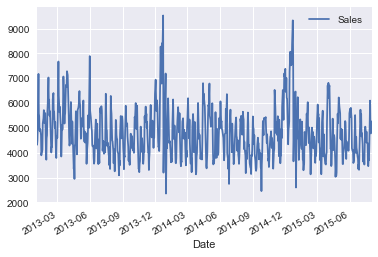

In [13]:
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

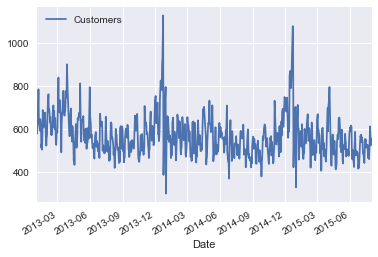

In [14]:
store1_open_data[['Customers']].plot()

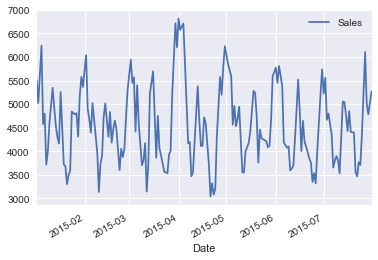

In [15]:
#TODO: Use the index filtering to filter to just 2015.  Zoom in on changes over time.
store1_open_data[['Sales']]['2015'].plot()

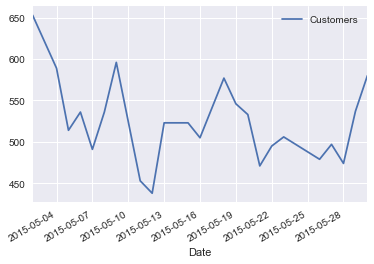

In [24]:
store1_open_data[['Customers']]['2015-05'].plot()

In [25]:
data['Sales'].resample('D', how='mean').autocorr(lag=1)

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  if __name__ == '__main__':


-0.025858276006383588

In [27]:
store1_open_data['Sales'].autocorr(lag=1)

0.68269082422794292

In [26]:
data[['Sales']].resample('A', how=['median', 'mean'])

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


Sales             
           median         mean
Date                          
2013-12-31   5598  5658.533675
2014-12-31   5794  5833.290704
2015-12-31   5916  5878.245380

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  if __name__ == '__main__':


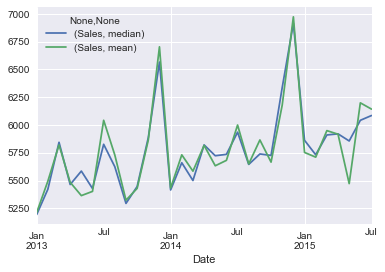

In [29]:
data[['Sales']].resample('M', how=['median', 'mean']).plot()

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:6195: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis, closed=closed)
/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(freq=D,window=3,center=True).mean()
  if __name__ == '__main__':


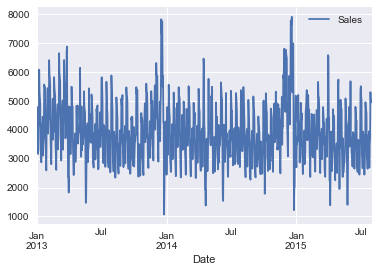

In [30]:
pd.rolling_mean(store1_data[['Sales']], window=3, center=True, freq='D').plot()

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(freq=D,window=3,center=True).mean()
  if __name__ == '__main__':


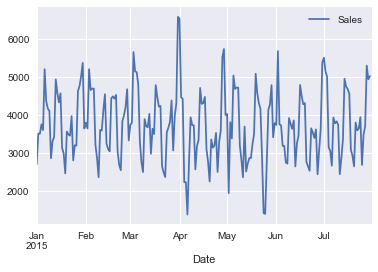

In [31]:
pd.rolling_mean(store1_data[['Sales']], window=3, center=True, freq='D')['2015'].plot()

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(freq=D,window=3,center=True).mean()
  if __name__ == '__main__':


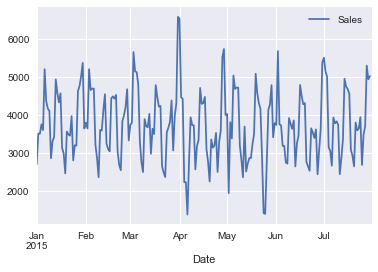

In [37]:
pd.rolling_mean(store1_data[['Sales']], window=3, center=True, freq='D')['2015'].plot()

/Users/clayton.schupp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,span=10,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


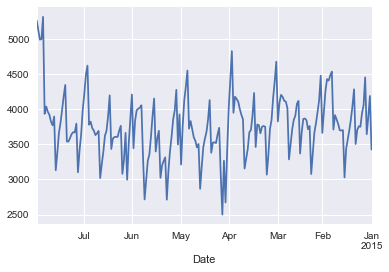

In [38]:
pd.ewma(store1_data['Sales'], span=10)['2015'].plot()

In [ ]:
store1_data['Sales'].diff(periods=1)['2015'].plot()

In [ ]:
store1_data['Sales'].diff(periods=7)['2015'].plot()

In [ ]:
pd.expanding_mean(store1_data['Sales'], freq='d').plot()

In [ ]:
pd.expanding_sum(store1_data['Sales'], freq='d').plot()